The **House Prices Prediction Challenge** hosted by Kaggle is a competition in which the goal is to predict the prices of the house based on a set of variables describing its location, year built, bedrooms, exterior and so more.

Throughout this jupyter notebook, I will be using Python.

The main libraries involved in this tutorial are:

- **pandas** for data manipulation and ingestion
- **matplotlib** and **seaborn** for data visualization
- **numpy** for multidimensional array computing
- **sklearn** for machine learning and predictive modeling

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Two datasets are available: a training set and a test set. We'll be using the training set to build our predictive model and the testing set to score it and generate an output.

Now let's start by loading training and test sets.

In [61]:
train_df = pd.read_csv(r"C:\Projects\House-Prices-Prediction\dataset\train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
test_df = pd.read_csv(r"C:\Projects\House-Prices-Prediction\dataset\test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [63]:
print("Train-set shape : {} \n".format(train_df.shape))
print("Test-set shape : {}".format(test_df.shape))

Train-set shape : (1460, 81) 

Test-set shape : (1459, 80)


For training set, we have:

- 1460 rows
- 81 columns

and for test set, we have:

- 1459 rows
- 80 columns

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Visual Exploratory Data analysis**

Let's visualize the prices of our target variable **SalePrice**  distribution in the training dataset.
<br>For that we wil be using distplot() here.

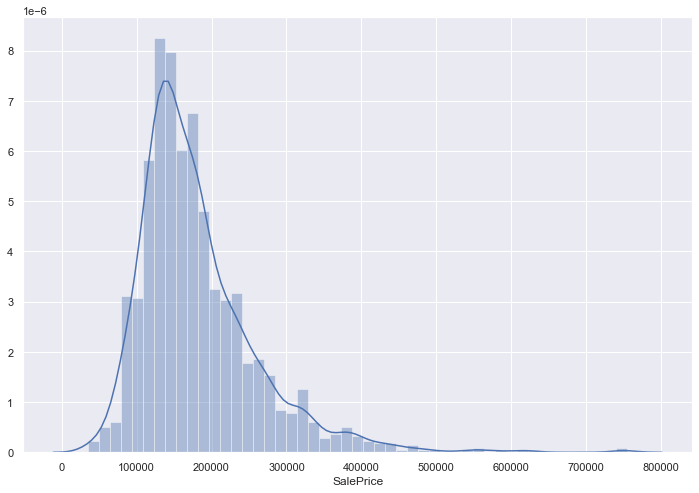

In [66]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.distplot(train_df['SalePrice'])

From the plot, it clearly seems that the most of the house prices lies in price range **100000 - 200000**($).

To check how much one variable is linked to other or dependent on each other, we need to find correlation between them as it clearly affects the prediction of our target variable.
<br>For that we will be using **corr()**.

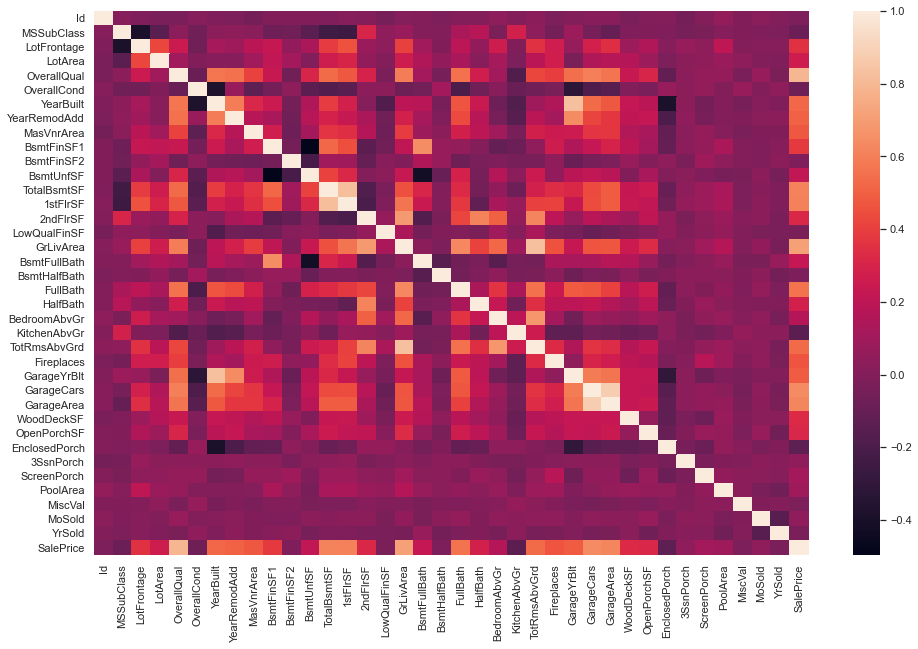

In [67]:
corr = train_df.corr()
plt.subplots(figsize=(16,10))
sns.heatmap(corr, vmax = 1,square = False)

For our analysis, we will be just choosing the variables whose correlation among each other is 0.3 or more.

In [68]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

So total 19 columns are available for analysis as per condition applied.

<br>Now accordingly choosing those variables for training and test sets for further analysis.

In [69]:
train_df  = train_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test_df = test_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

From correlation heatmap,it seems the variable **1stFlrSF** is very much correlated with the target variable.
<br>Let's visualize the relation between them using scatter plot and plotting regression line too.
<br>The perfect plot to use here is **lmplot()**.

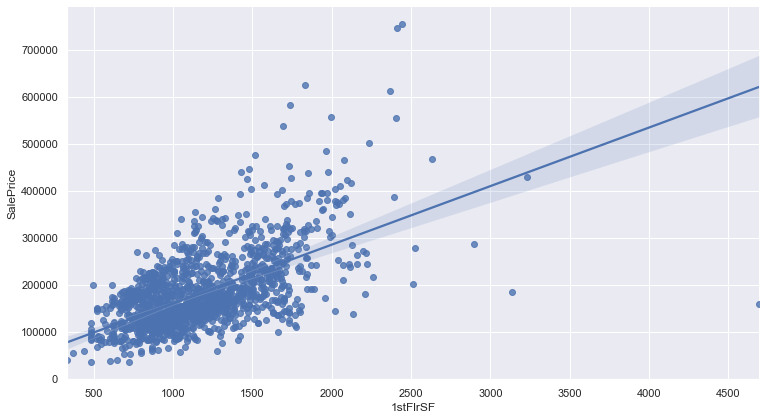

In [70]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train_df,height=6, aspect=1.8) # 1stFlrSF seems very corelated with SalePrice.

Now, Let's check the relation between **GrLivArea** and **SalePrice** using scatter plot.

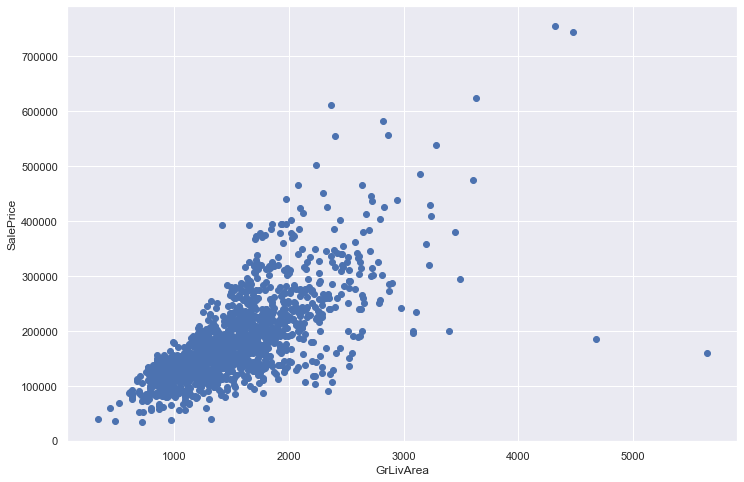

In [71]:
sns.set(rc = {'figure.figsize':(12,8)})
plt.scatter(x= 'GrLivArea', y='SalePrice', data=train_df)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Plotting a boxplot for variables **GarageCars** and **SalePrice** to check the price distribution.

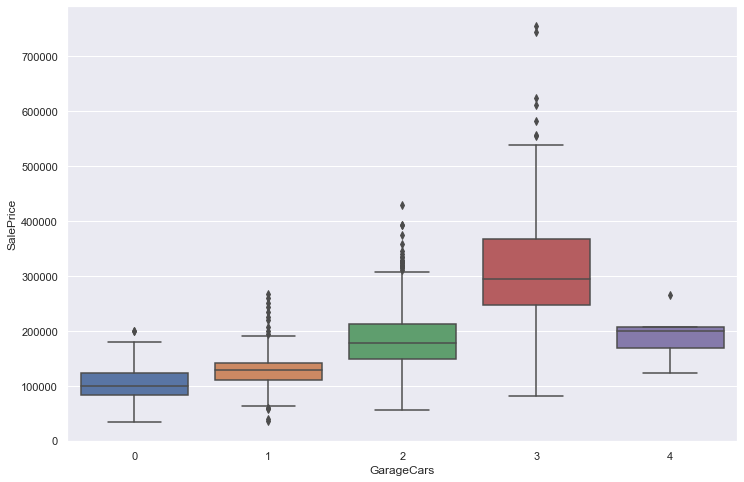

In [72]:
sns.boxplot(x='GarageCars',y='SalePrice',data=train_df)

It seems that mean house price for Garage with 3 cars is maximum and with no cars in minimum.
<br>Also it can be noticed that the price range for Garage with 3 cars is most wide, signifying the most varieties in that section.

Let us check now, how the price varies according to the Garage Area provided.
<br>For this we will be using lineplot(lmplot())

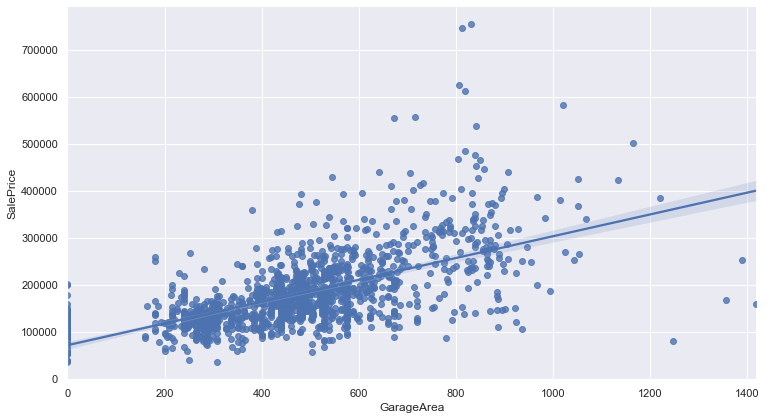

In [73]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train_df,height=6, aspect=1.8)

Clearly, the house prices increases with increase in Garage area.

Plotting barplot between **SalePrice** and **FullBath** to check the prices distribution.

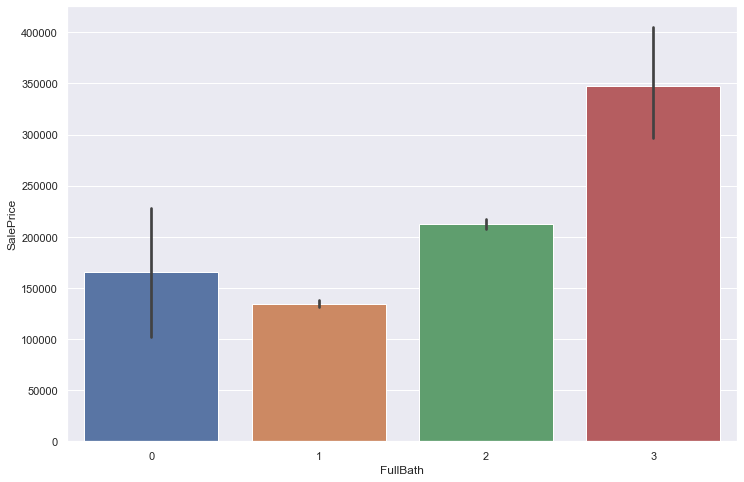

In [74]:
sns.barplot(x='FullBath',y = 'SalePrice',data=train_df)

# Handling Missing Data

In [75]:
#For training set
train_df.isnull().sum()

LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

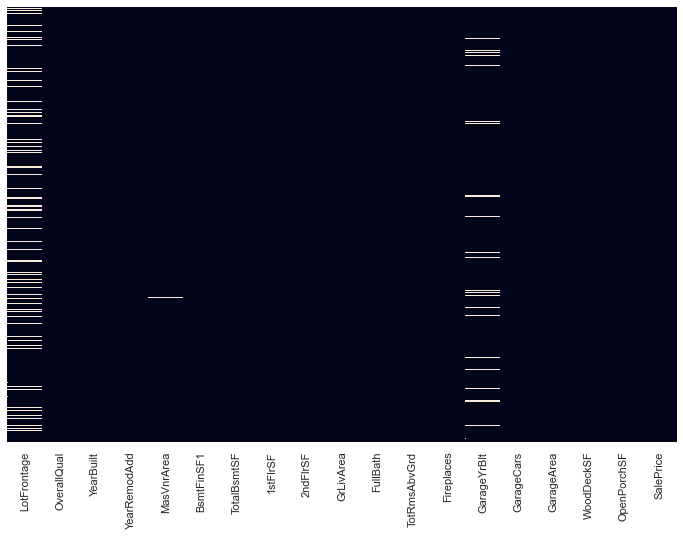

In [76]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [77]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train_df)

,Total,Percent
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [78]:
train_df.drop(['LotFrontage'],axis=1,inplace=True)

In [79]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

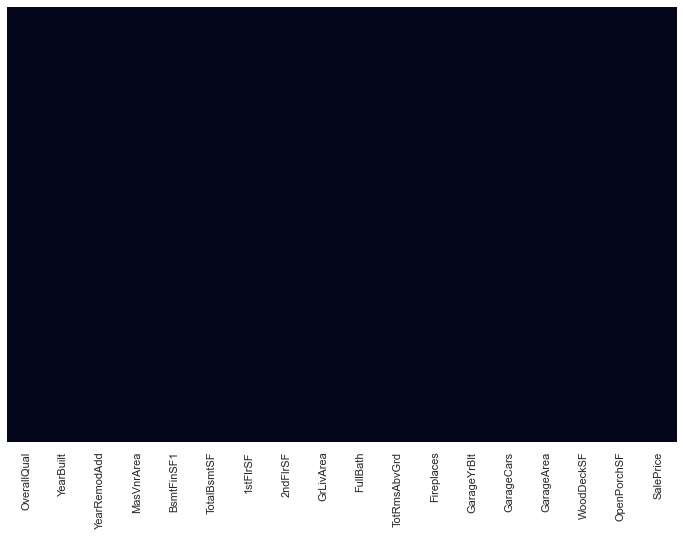

In [80]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1460 non-null   float64
 4   BsmtFinSF1    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   2ndFlrSF      1460 non-null   int64  
 8   GrLivArea     1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
 11  Fireplaces    1460 non-null   int64  
 12  GarageYrBlt   1460 non-null   float64
 13  GarageCars    1460 non-null   int64  
 14  GarageArea    1460 non-null   int64  
 15  WoodDeckSF    1460 non-null   int64  
 16  OpenPorchSF   1460 non-null   int64  
 17  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(16)
mem

All the null values in the training set have been handled successfully.

In [82]:
# For test set
test_df.isnull().sum()

LotFrontage     227
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
dtype: int64

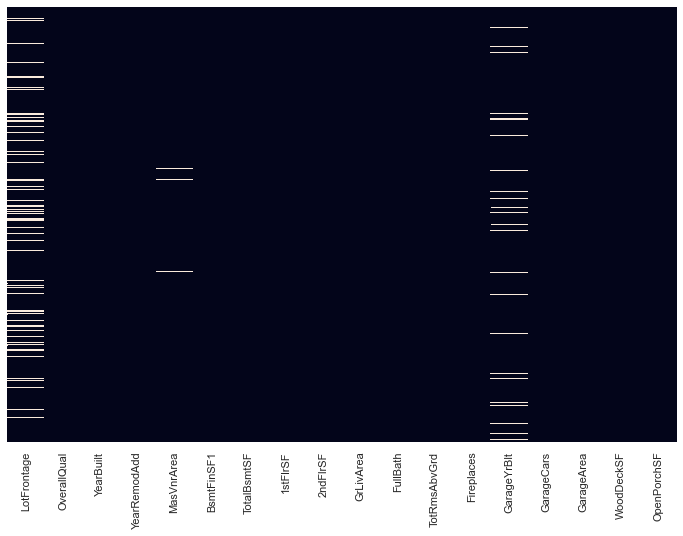

In [83]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [84]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(test_df)

,Total,Percent
LotFrontage,227,15.56
GarageYrBlt,78,5.35
MasVnrArea,15,1.03
TotalBsmtSF,1,0.07
GarageArea,1,0.07
GarageCars,1,0.07
BsmtFinSF1,1,0.07


In [85]:
test_df.drop(['LotFrontage'],axis=1,inplace=True)

In [86]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

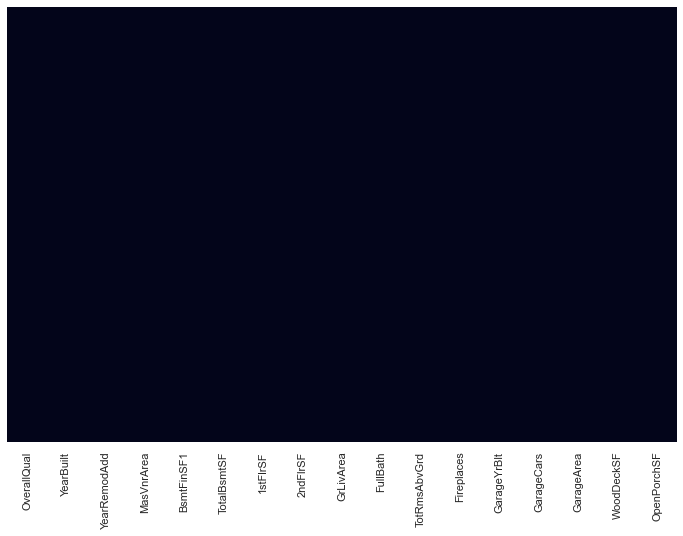

In [87]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   MasVnrArea    1459 non-null   float64
 4   BsmtFinSF1    1459 non-null   float64
 5   TotalBsmtSF   1459 non-null   float64
 6   1stFlrSF      1459 non-null   int64  
 7   2ndFlrSF      1459 non-null   int64  
 8   GrLivArea     1459 non-null   int64  
 9   FullBath      1459 non-null   int64  
 10  TotRmsAbvGrd  1459 non-null   int64  
 11  Fireplaces    1459 non-null   int64  
 12  GarageYrBlt   1459 non-null   float64
 13  GarageCars    1459 non-null   float64
 14  GarageArea    1459 non-null   float64
 15  WoodDeckSF    1459 non-null   int64  
 16  OpenPorchSF   1459 non-null   int64  
dtypes: float64(6), int64(11)
memory usage: 193.9 KB


All the null values in the test set have been handled successfully.

# Model Making and Prediction

Now we are ready to train a model and predict the required solution. Our problem is a regression problem. We want to identify relationship between output (SalePrice) with other variables or features ('GarageCars',
       'GarageArea','1stFlrSF'...). We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset.

<br>There are many model algorithms, but we are mainly using the ones given below:
- Linear Regression
- Decision Tree
- Support Vector Machines
- Random Forest

In [89]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Scaling the data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [92]:
print(X_train)

[[ 0.63603069 -0.03237831 -0.71164439 ...  0.25381261  0.00342692
  -0.7159742 ]
 [-0.82305655  1.10643418  0.97616358 ...  0.22981353 -0.74109876
  -0.31118673]
 [ 0.63603069  1.23658418  1.16905592 ...  0.65699721  0.54282817
  -0.06542291]
 ...
 [-0.82305655 -0.52044081  0.25281731 ...  0.45540491 -0.74109876
  -0.7159742 ]
 [ 0.63603069 -1.7243283   0.63860199 ... -1.25332981 -0.74109876
   2.75363267]
 [ 0.63603069  1.17150918  1.07260975 ...  0.87778877  0.34530095
  -0.42684029]]


In [93]:
print(y_train)

[[-0.09426066]
 [-0.46807085]
 [ 0.43680762]
 ...
 [-0.85477106]
 [ 0.11133495]
 [-0.09426066]]


In [94]:
# linear Regression 
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [95]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 0.2963908630759485
MSE: 0.17649469350286726
RMSE: 0.42011271523588434


In [96]:
# decision Tree
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [97]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.3705022570479652
MSE: 0.32451212119723655
RMSE: 0.5696596538260688


In [98]:
# support Vector Machine
svr = SVR()
svr.fit(X_train, y_train) 
svr_prediction = svr.predict(X_test)

# Evaluation metrics
mae_svr = metrics.mean_absolute_error(y_test, svr_prediction)
mse_svr =  metrics.mean_squared_error(y_test, svr_prediction)
rmse_svr =  np.sqrt(mse_svr)

C:\Users\verma\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

MAE: 0.24273487852193618
MSE: 0.18740941835522967
RMSE: 0.4329080945827066


In [100]:
# random forest regressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

<ipython-input-100-ffe610fbb0f2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [101]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.23053146931778754
MSE: 0.11047850701786144
RMSE: 0.3323830727005535


In [102]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Support Vector Machine', 
              'Random Forest'],
    'Score': [rmse_lm, rmse_dt, rmse_svr, 
              rmse_rf]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,Random Forest,0.332383
0,Linear Regression,0.420113
2,Support Vector Machine,0.432908
1,Decision Tree,0.569660


We can say the best working model by looking RMSE rates The best working model is **Random Forest**.